##### We will start our Analysis in importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


##### the above dataset have NaN values after 1510th we will remove all the NaN columns

In [3]:
df = df.iloc[:1510,:]

In [4]:
df.drop("Unnamed: 0", inplace = True, axis = 1)

WE WILL DIVIDE DATE COLUMN INTO TWO CATEGORIES WHICH WILL HELP IN OUR ANALYSIS

In [5]:
df.Date = pd.to_datetime(df.Date)
Day = df.Date.dt.day.to_frame()
month = df.Date.dt.month.to_frame()

Date= Day.join(month, how='right', lsuffix='_day', rsuffix="_month")
df = df.join(Date, how= "left")
df.drop("Date", inplace = True, axis = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,1.37,1044280.56,18945.56,749309.20,3039.37,272986.43,211934.06,61052.37,0.00,conventional,2015,NewYork,18,1
1506,1.34,1018225.83,15880.80,714530.70,2315.72,285498.61,221731.33,63767.28,0.00,conventional,2015,NewYork,11,1
1507,1.09,1402890.20,23641.00,1127882.44,1871.07,249495.69,178683.01,70812.68,0.00,conventional,2015,NewYork,4,1
1508,1.20,3156360.20,69920.54,2313155.65,35858.35,737425.66,690116.94,46305.06,1003.66,conventional,2015,Northeast,27,12


In [6]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Date_day', 'Date_month'],
      dtype='object')

In [7]:
df['Date_month']=df['Date_month'].astype('str')
df['Date_day']=df['Date_day'].astype('str')

# Encoding the Data with Label Encoder converting all the catagorical data into numeric values.

In [8]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['type', 'region', "Date_month", 'Date_day']

for i in catagorical_data:
    df[i]=LE.fit_transform(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1510 non-null   float64
 1   Total Volume  1510 non-null   float64
 2   4046          1510 non-null   float64
 3   4225          1510 non-null   float64
 4   4770          1510 non-null   float64
 5   Total Bags    1510 non-null   float64
 6   Small Bags    1510 non-null   float64
 7   Large Bags    1510 non-null   float64
 8   XLarge Bags   1510 non-null   float64
 9   type          1510 non-null   int32  
 10  year          1510 non-null   int64  
 11  region        1510 non-null   int32  
 12  Date_day      1510 non-null   int32  
 13  Date_month    1510 non-null   int32  
dtypes: float64(9), int32(4), int64(1)
memory usage: 141.7 KB


### Lets Check the NaN values

In [10]:
df.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Date_day        0
Date_month      0
dtype: int64

There is no Null values in the data Lets check for the correlation of the data

In [11]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Date_day,Date_month
AveragePrice,1.000000,-0.175996,-0.301716,-0.037369,-0.047303,-0.069000,-0.040164,-0.176231,-0.100539,NaN,NaN,-0.137026,0.012971,0.122286
Total Volume,-0.175996,1.000000,0.873949,0.913967,0.747312,0.878002,0.883191,0.438949,0.349589,NaN,NaN,0.043324,-0.006332,0.028742
4046,-0.301716,0.873949,1.000000,0.617256,0.454106,0.615080,0.644402,0.193846,0.123689,NaN,NaN,0.001315,-0.004237,0.040395
4225,-0.037369,0.913967,0.617256,1.000000,0.795034,0.869609,0.856922,0.514860,0.423952,NaN,NaN,0.049604,-0.009633,0.015382
4770,-0.047303,0.747312,0.454106,0.795034,1.000000,0.783317,0.759390,0.471481,0.691414,NaN,NaN,0.004207,-0.011526,0.024581
Total Bags,-0.069000,0.878002,0.615080,0.869609,0.783317,1.000000,0.987087,0.598408,0.407105,NaN,NaN,0.132236,0.003319,0.006850
Small Bags,-0.040164,0.883191,0.644402,0.856922,0.759390,0.987087,1.000000,0.464925,0.345086,NaN,NaN,0.108809,0.005749,0.014684
Large Bags,-0.176231,0.438949,0.193846,0.514860,0.471481,0.598408,0.464925,1.000000,0.387203,NaN,NaN,0.201052,-0.010044,-0.039317
XLarge Bags,-0.100539,0.349589,0.123689,0.423952,0.691414,0.407105,0.345086,0.387203,1.000000,NaN,NaN,0.020419,-0.004595,0.009425
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clearly "type" has no relation with any other column but lets check what are the unique values in "type" since "type" being a categorical column as above description.

In [12]:
df["type"].unique()

array([0])

Since "type" has only one value because of which it has no Correlation so we will remove "type"

In [13]:
df.drop("type", inplace = True, axis = 1)

# We will visualize the correlation in a Graph

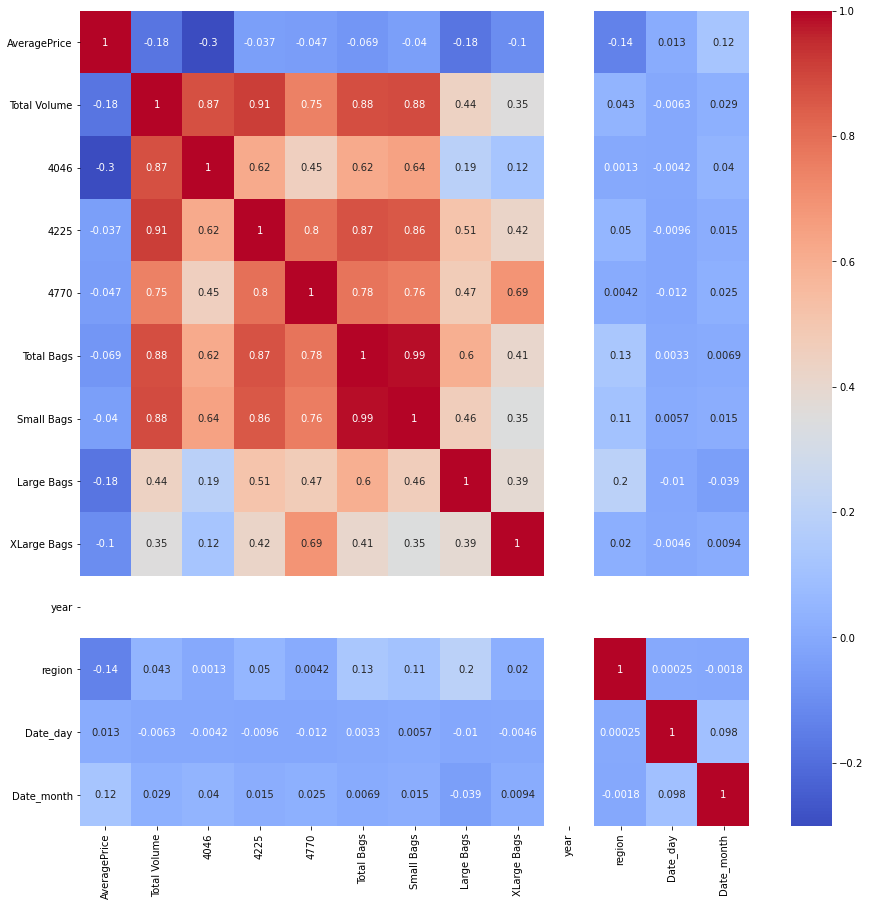

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

The observation of Correlation and the detail we will visualize with Target variable
    1. AveragePrice
    2. region

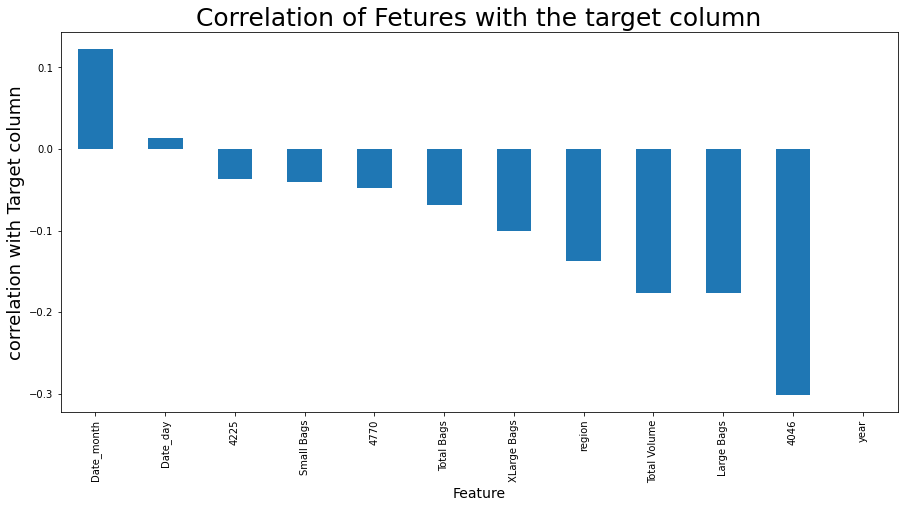

In [15]:
plt.figure(figsize=(15,7))
df.corr()["AveragePrice"].sort_values(ascending=False).drop(["AveragePrice"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Key Observations:
    Date_month      0.159641
    year            0.159641
    Date_year       0.089223
    Date_year       0.055354
    XLarge Bags    -0.046122
    4225           -0.089724
    Small Bags     -0.095698
    4770           -0.099446
    Total Bags     -0.109739
    Total Volume   -0.138816
    Large Bags     -0.176563
    4046           -0.189156
    region         -0.223469
    

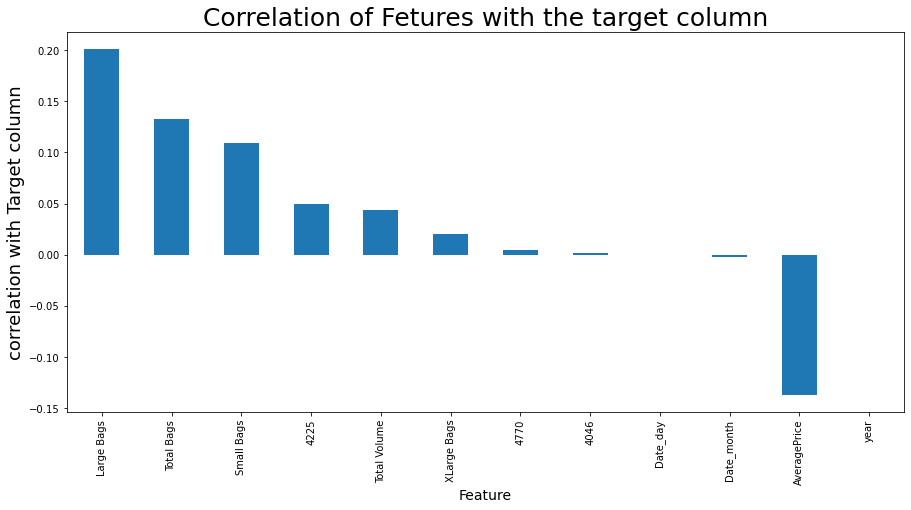

In [16]:
plt.figure(figsize=(15,7))
df.corr()["region"].sort_values(ascending=False).drop(["region"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

# Key observation:
    Large Bags      0.296865
    4046            0.268769
    Total Volume    0.235746
    4225            0.214802
    Total Bags      0.189124
    Small Bags      0.167741
    4770            0.137434
    Date_year       0.003420
    Date_year      -0.027127
    XLarge Bags    -0.047330
    AveragePrice   -0.223469
    Date_month     -0.467656
    year           -0.467656

# Skeness Identification

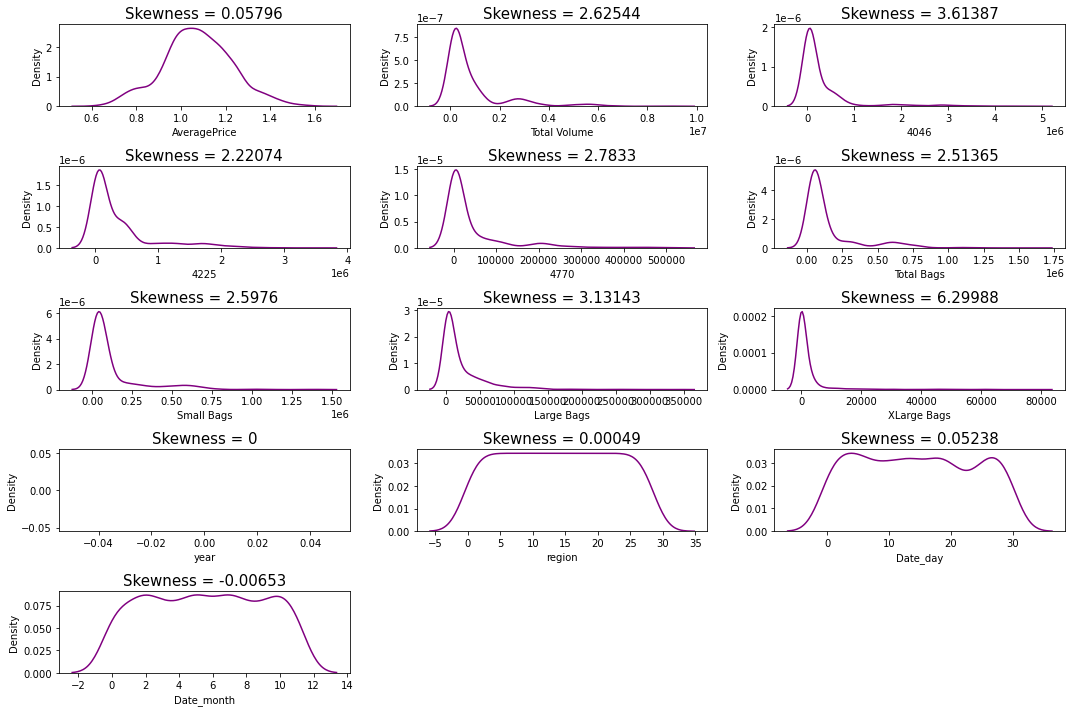

In [17]:
plt.figure(figsize=(15,10))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(5,3,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

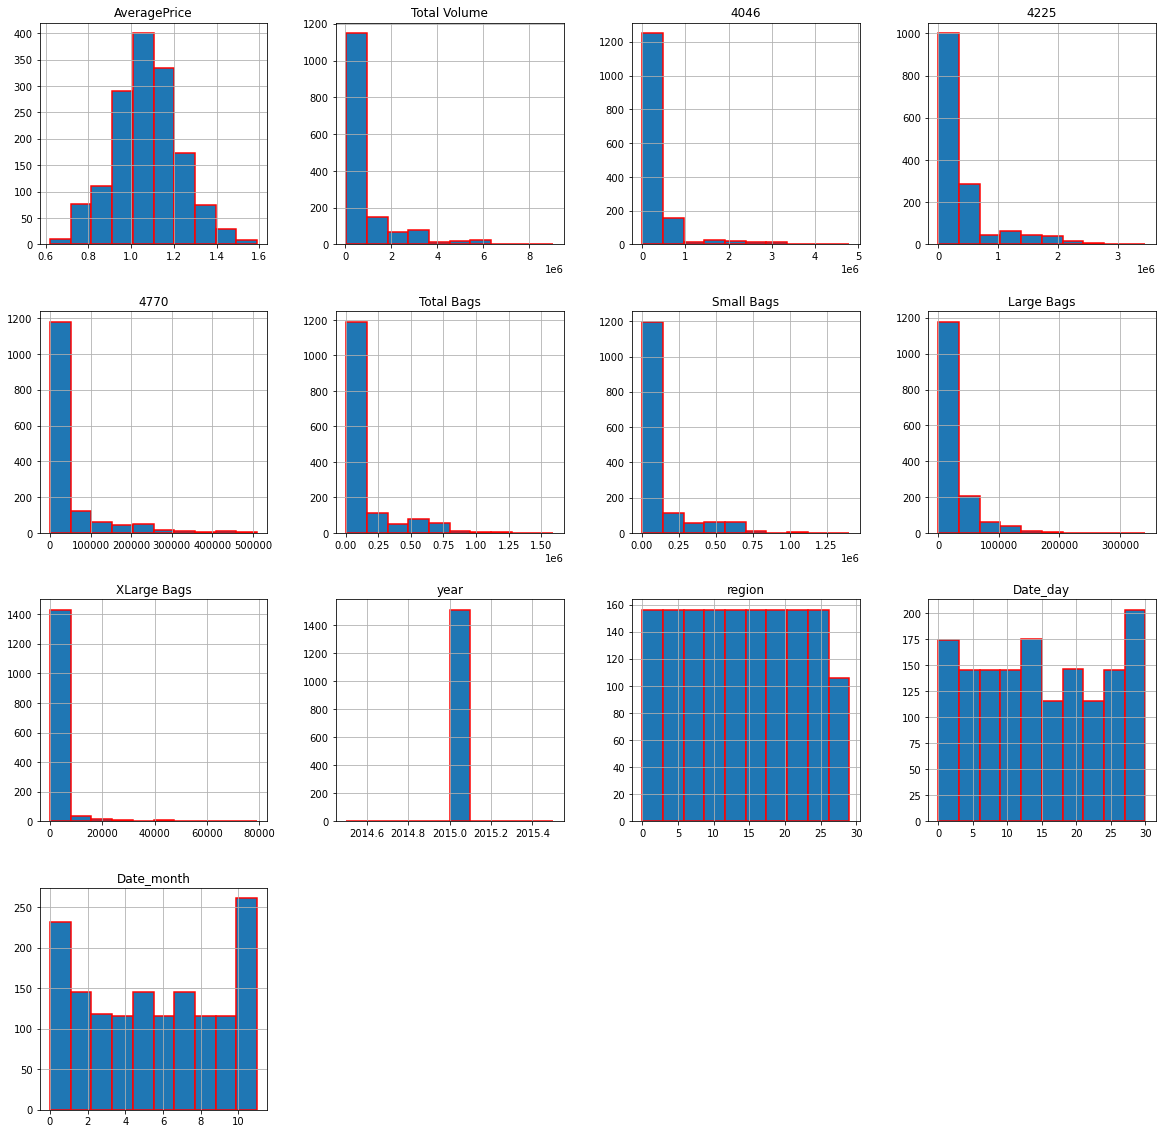

In [18]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

In [19]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,XLarge Bags,6.299877
1,4046,3.613870
2,Large Bags,3.131428
3,4770,2.783301
4,Total Volume,2.625439
5,Small Bags,2.597602
6,Total Bags,2.513650
7,4225,2.220744
8,AveragePrice,0.057960
9,Date_day,0.052375


In [20]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['XLarge Bags', '4046', 'Large Bags', '4770', 'Total Volume', 'Small Bags', 'Total Bags', '4225'] 

negative Skewed data:
 []


In [21]:
df.skew().mean()

1.9915540028139598

# Key Observation:
    We have Nine columns which has skewness greater than +0.5 as mentioned above no column below -0.5 skewness. 
    And also average skewness of whole dateset is greater than 3.5 we further will work with skewness in the data. 

# Lets Identify the Outliers

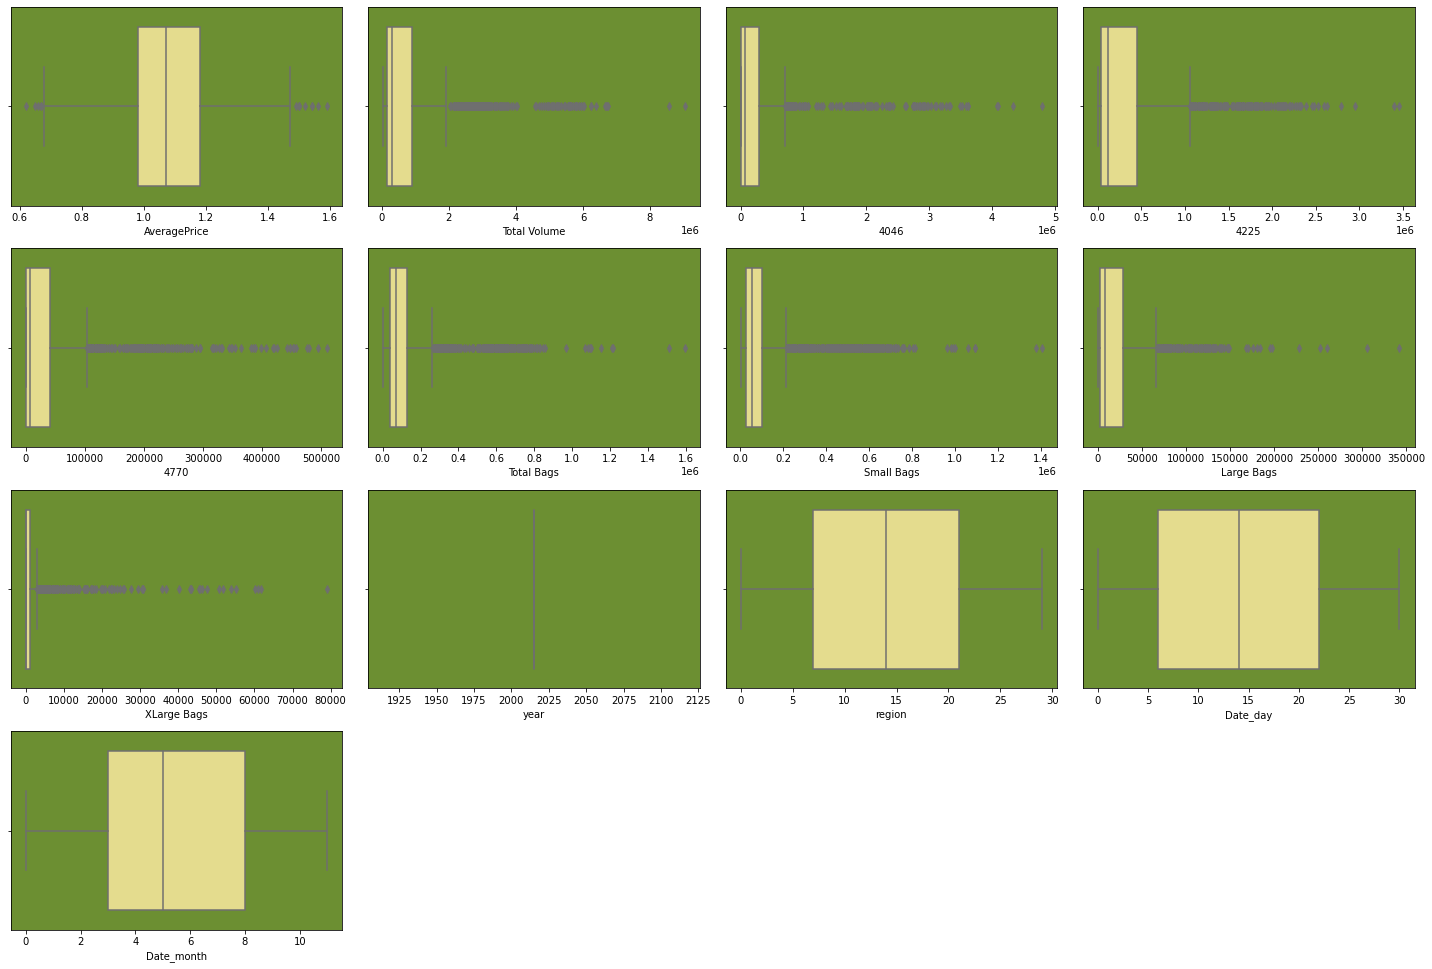

In [22]:
plt.figure(figsize=(20,50))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "#F2E880" , orient = "h")
    ax.set_facecolor("#6C8F32")
    plt.tight_layout()

# From the above observation its evident that the data have more outliers lets try in removing the outliers.

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Date_day,Date_month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015,0,19,3
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015,0,12,3
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015,0,4,3
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015,0,27,3
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015,0,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1.14,1111803.12,15004.70,905344.06,1227.89,190226.47,156660.80,33558.60,7.07,2015,28,14,2
1465,1.23,1048045.86,18035.94,790163.44,540.63,239305.85,192750.44,46555.41,0.00,2015,28,17,1
1469,1.16,1201066.41,15448.68,941112.78,983.60,243521.35,185973.17,57548.18,0.00,2015,28,19,11
1470,1.18,1192210.54,16098.34,913022.98,801.09,262288.13,214317.49,47970.64,0.00,2015,28,12,11


In [24]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new1.shape}\nThe percentage of data loss {((1510-894)/1510)*100}%")

Orginal Data (1510, 13)
After Removing outliers (1046, 13)
The percentage of data loss 40.794701986754966%


In [25]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [26]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((1510-1427)/1510)*100}%")

Orginal Data (1510, 13)
After Removing outliers (0, 13)
The percentage of data loss 5.496688741721854%


#### The loss of data is 5.49% in Z-Score method and 40% in IQR method which is pity bad and on removing the same will affect the performance of the data so we have to work with the outliers present in the data.

In [27]:
Avacado_color_1 ="#F2E880"
Avacado_color_2 ="#FFE12D"
Avacado_color_3 ="#8BC451"
Avacado_color_4 ="#356211"
Avacado_color_5 ="#6C8F32"

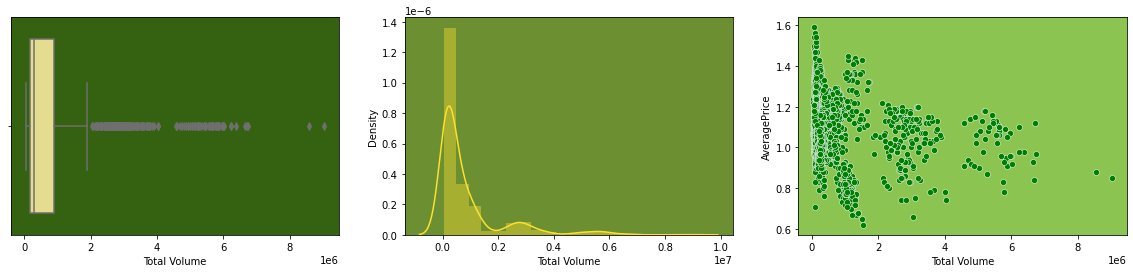

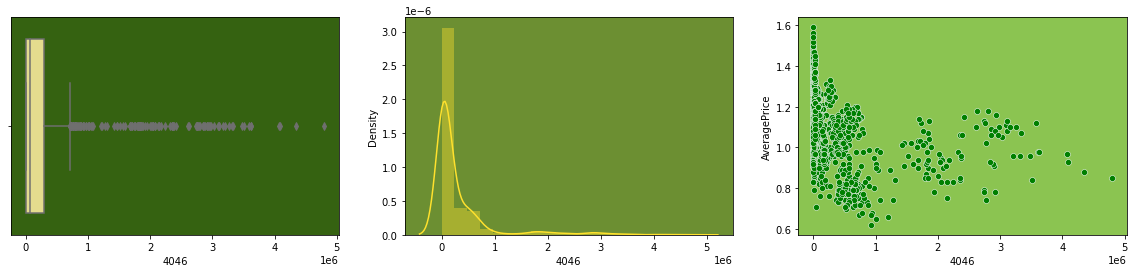

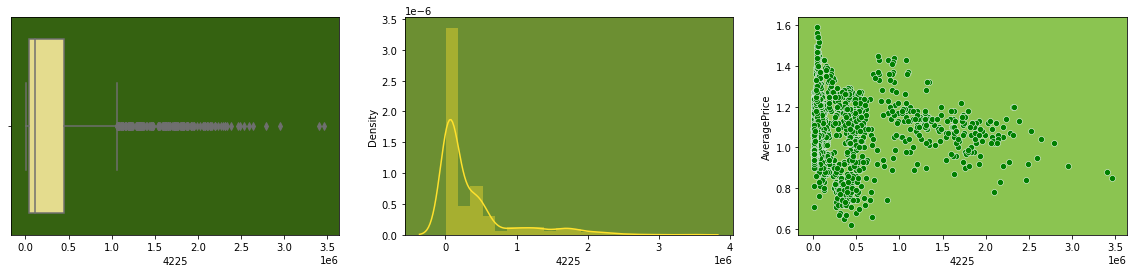

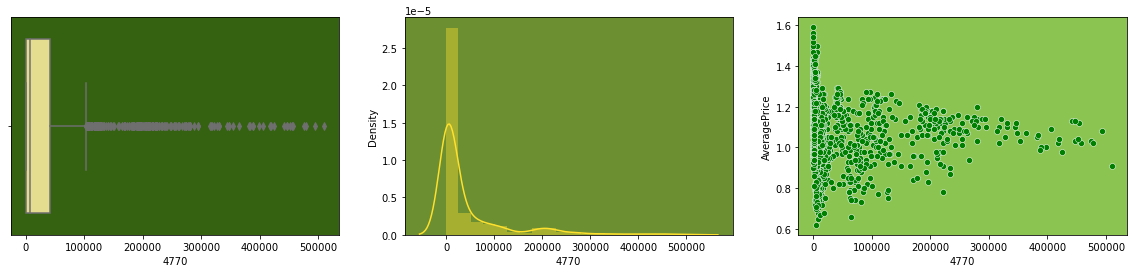

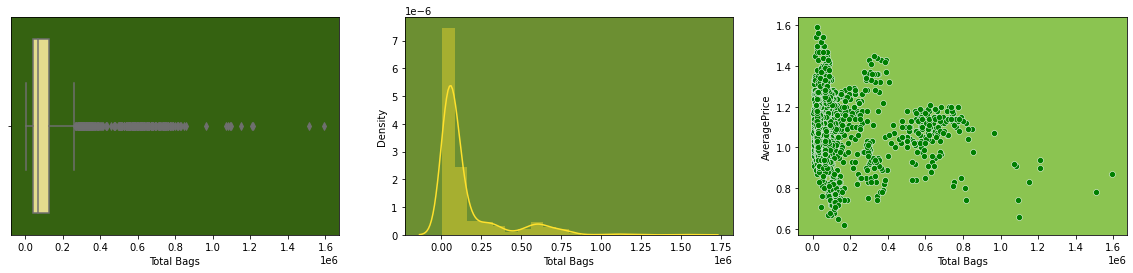

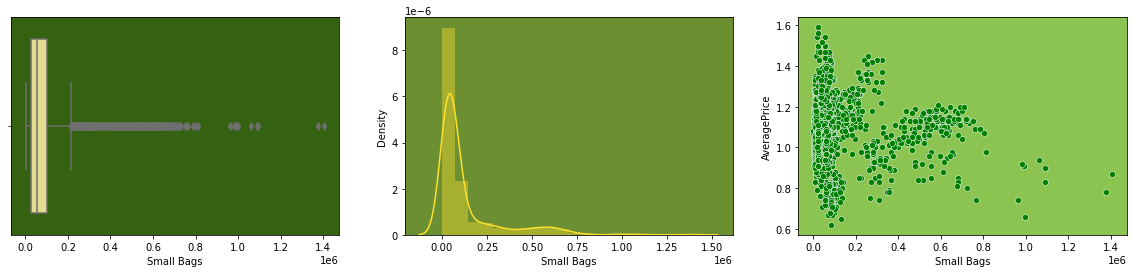

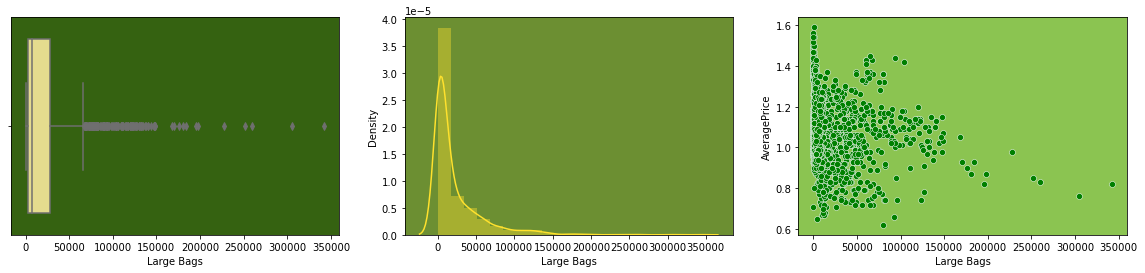

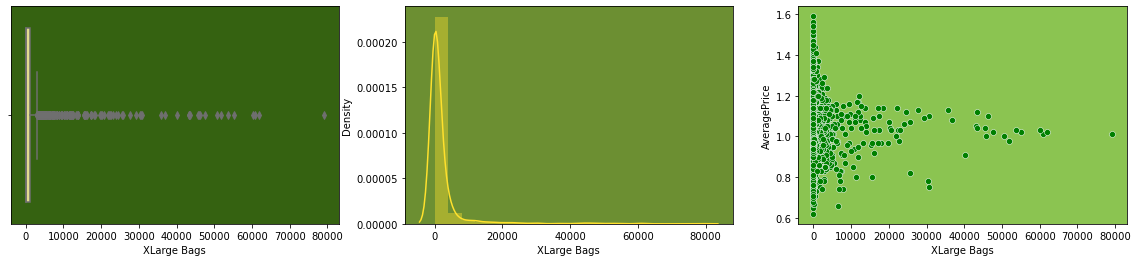

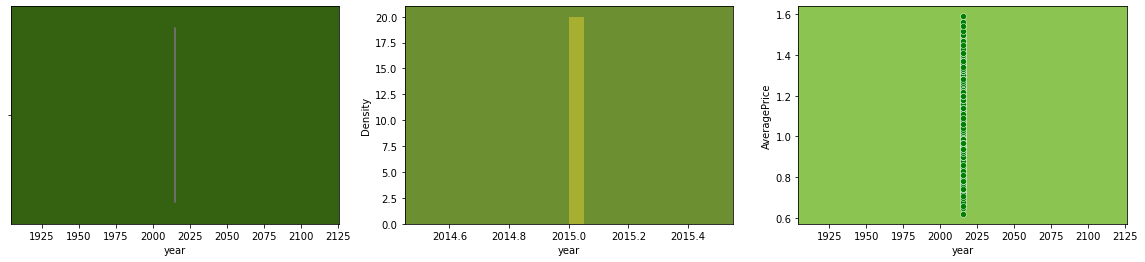

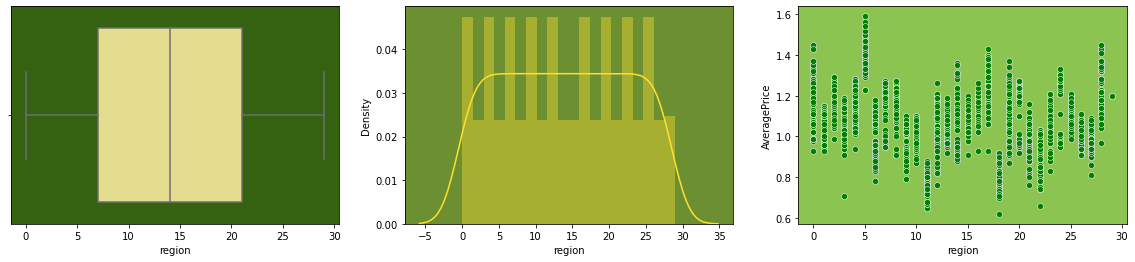

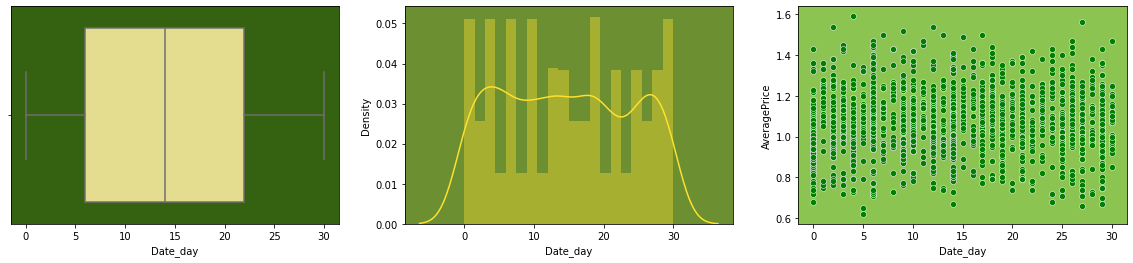

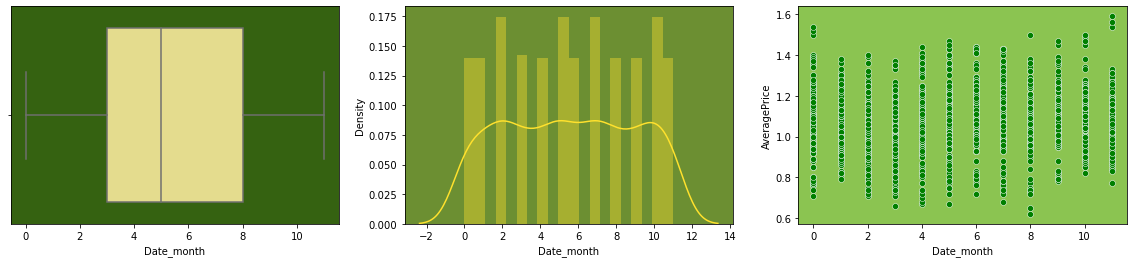

In [28]:
target_variable_1 = "AveragePrice"
feature_variable = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region',
       'Date_day', 'Date_month']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=Avacado_color_1)
    a1.set_facecolor(Avacado_color_4)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=Avacado_color_2)
    a2.set_facecolor(Avacado_color_5)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_1, ax=axs[2], color="g")
    a3.set_facecolor(Avacado_color_3)
    plt.show()
    
for i in feature_variable:
    num_plots(i)  

#### The above is the observation of the Feature variable with Target variable 1 as clear that the variable which has more correlation has more scattered points in the data

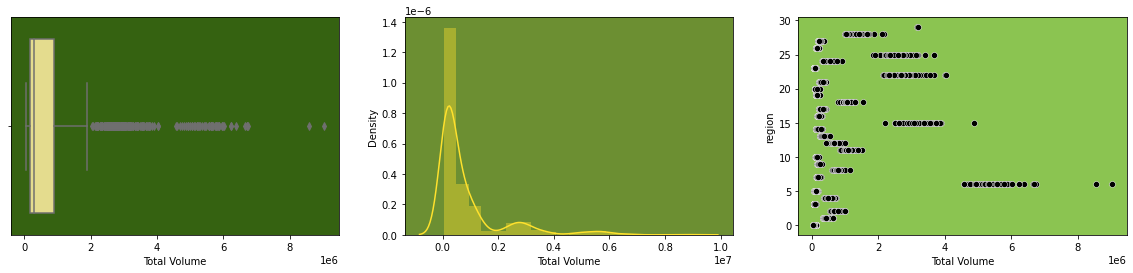

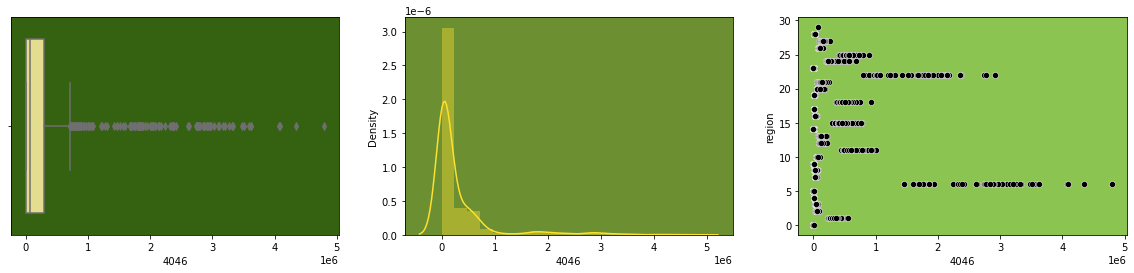

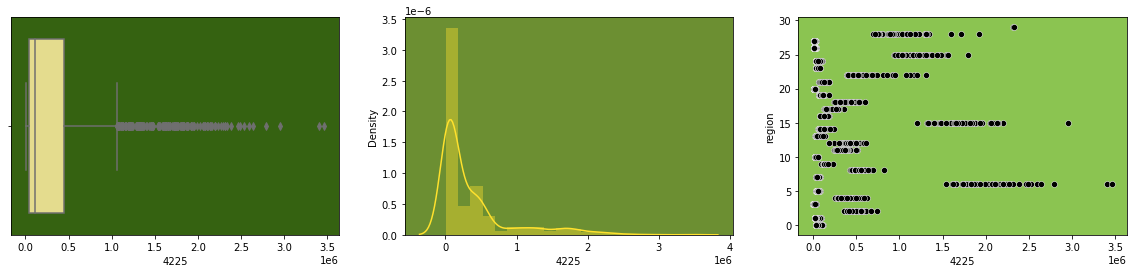

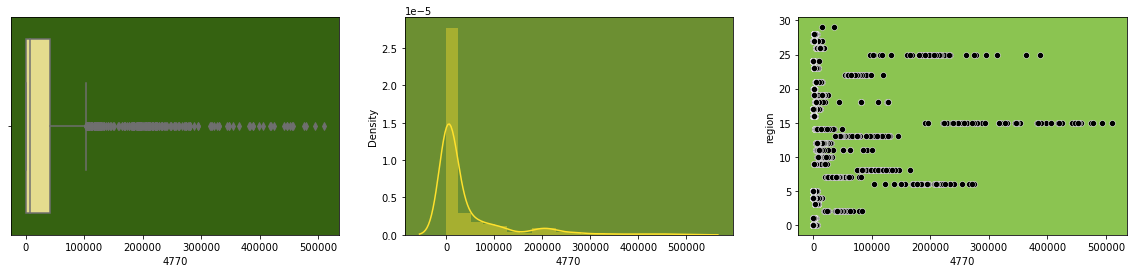

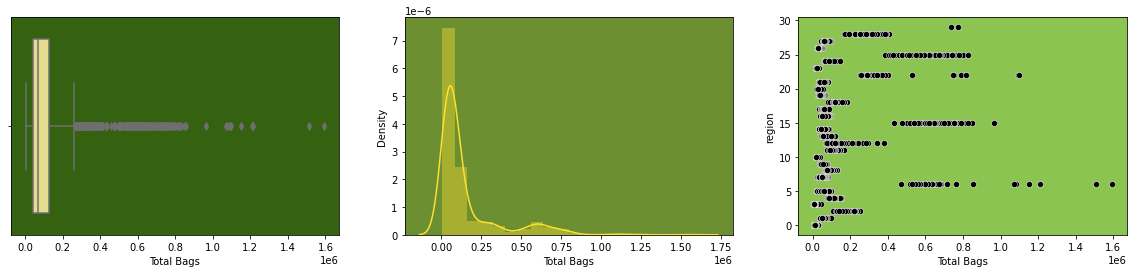

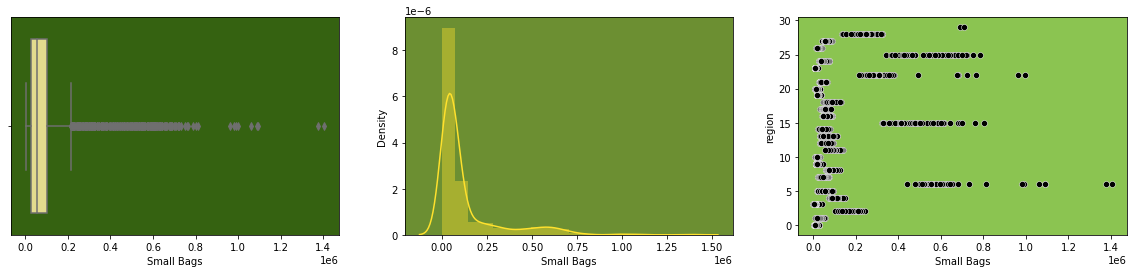

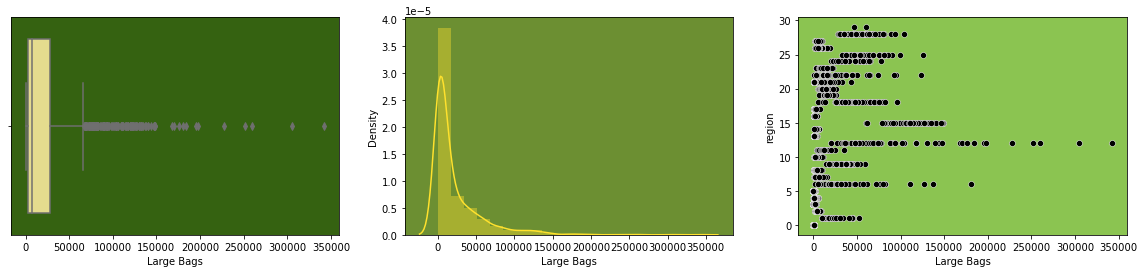

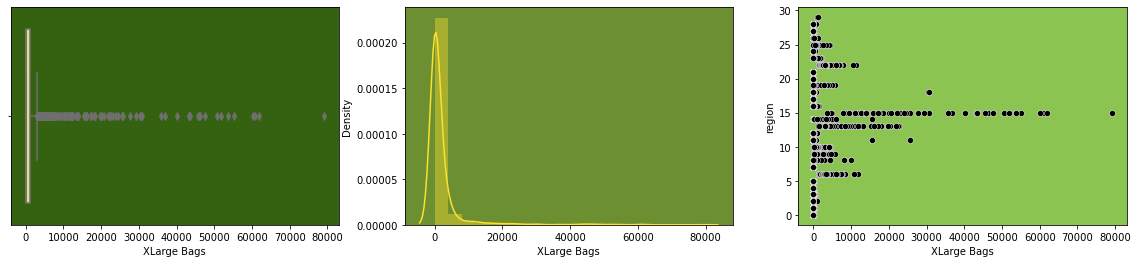

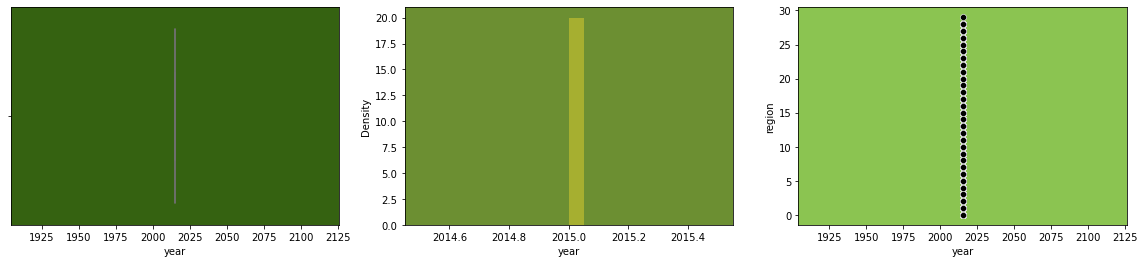

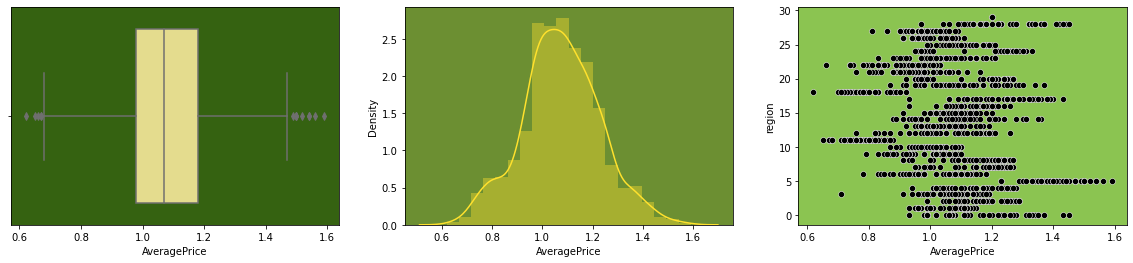

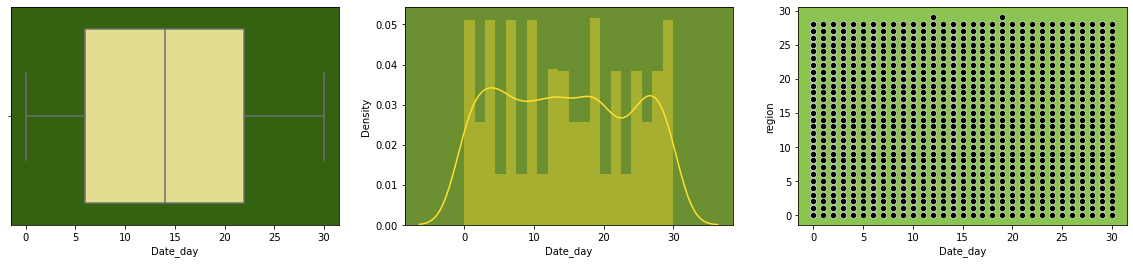

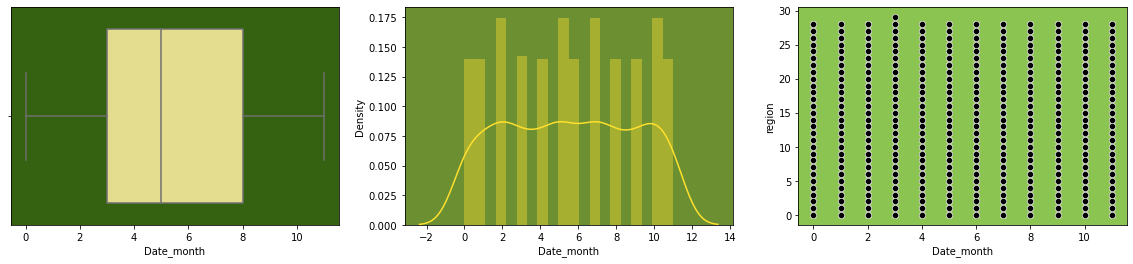

In [29]:
target_variable_2 = 'region'
feature_variable = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year',"AveragePrice" ,
       'Date_day', 'Date_month']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=Avacado_color_1)
    a1.set_facecolor(Avacado_color_4)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=Avacado_color_2)
    a2.set_facecolor(Avacado_color_5)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_2, ax=axs[2], color="k")
    a3.set_facecolor(Avacado_color_3)
    plt.show()
    
for i in feature_variable:
    num_plots(i) 

#### As similar to Target variable 1 the above is the observation of the Feature variable with Target variable 2 as clear that the variable which has more correlation has more scattered points in the data

In [30]:
x_2=df.drop(["region"], axis = 1)
y_2=df.region
x_1=df.drop(["AveragePrice"], axis = 1)
y_1=df.AveragePrice
# x_1 is target vatiable 1 y_1 is the feature variable 1
# x_2 is target vatiable 1 y_2 is the feature variable 1

In [31]:
df["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

# Scaling the DataSet

In [32]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_1, x_2= sc.fit_transform(x_1), sc.fit_transform(x_2)
x_1

array([[-0.62497206, -0.48088362, -0.58365807, ..., -1.67324751,
         0.48466217, -0.74226486],
       [-0.63245657, -0.48148272, -0.60217951, ..., -1.67324751,
        -0.27597319, -0.74226486],
       [-0.58180369, -0.48128368, -0.48045693, ..., -1.67324751,
        -1.14527075, -0.74226486],
       ...,
       [ 0.44549183, -0.44352176,  1.44174321, ...,  1.6685052 ,
         1.13663534, -1.62065039],
       [ 1.84766664, -0.36702779,  3.67818086, ...,  1.78785351,
         0.48466217, -0.74226486],
       [ 1.87466294, -0.3626378 ,  3.71127394, ...,  1.78785351,
        -0.27597319, -0.74226486]])

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        
        

Best Accuracy 32.25923742013484 found on randomstate 369


In [34]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [35]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Lets shortlist promising Regression models.

In [36]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [37]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.2233344503071032

ERROR:
MEAN ABSOLUTE ERROR:  0.09867863721920409
MEAN SQUARED ERROR:  0.015925493253865965
ROOT MEAN SQUARED ERROR : 0.12619624896907977
R2 SCORE:  0.32259237420134834
**********************************************************************************************************



Score of Lasso() is: 0.0

ERROR:
MEAN ABSOLUTE ERROR:  0.12242736552807224
MEAN SQUARED ERROR:  0.02365533373924749
ROOT MEAN SQUARED ERROR : 0.15380290549676717
R2 SCORE:  -0.006204530706666267
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.223332981898546

ERROR:
MEAN ABSOLUTE ERROR:  0.09866708846175754
MEAN SQUARED ERROR:  0.015926946699413917
ROOT MEAN SQUARED ERROR : 0.12620200750944463
R2 SCORE:  0.32253055036442413
**********************************************************************************************************



Score of ElasticNet() i

In [38]:
mean_score= []
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [-0.13456126 -0.51492884 -2.06931804  0.20726469 -0.45042772]
MEAN OF SCORE is : -0.5923942335816686
Standard Deviation : 0.7818599302655823
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-0.53182066 -0.05713861 -0.00391909 -0.24145691 -0.04732546]
MEAN OF SCORE is : -0.17633214486996862
Standard Deviation : 0.19554508444433133
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [-0.13511058 -0.51002203 -2.02442807  0.2068262  -0.4499837 ]
MEAN OF SCORE is : -0.5825436335018515
Standard Deviation : 0.7648742800032304
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-0.53182066 -0.05713861 -0.00391909 -0.24145691 -0.04732546]
MEAN OF SCORE is : -0.17633214486996862
Sta

In [39]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)



,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,1.000000,-1.300775,1.027043,0.061799,0.007006,0.083701,0.702000
8,RandomForestRegressor,0.972773,-0.213999,0.655884,0.048225,0.003989,0.063156,0.830339
5,KNeighborsRegressor,0.723045,-0.487372,0.836564,0.077698,0.010799,0.103918,0.540653
7,AdaBoostRegressor,0.653608,0.220652,0.263057,0.079488,0.009138,0.095590,0.611325
4,SVR,0.634711,-0.287971,0.467726,0.077892,0.009478,0.097356,0.596836
0,LinearRegression,0.223334,-0.592394,0.781860,0.098679,0.015925,0.126196,0.322592
2,Ridge,0.223333,-0.582544,0.764874,0.098667,0.015927,0.126202,0.322531
1,Lasso,0.000000,-0.176332,0.195545,0.122427,0.023655,0.153803,-0.006205
3,ElasticNet,0.000000,-0.176332,0.195545,0.122427,0.023655,0.153803,-0.006205


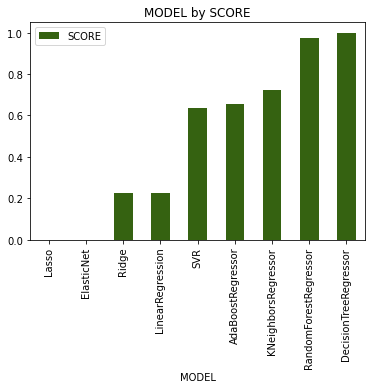

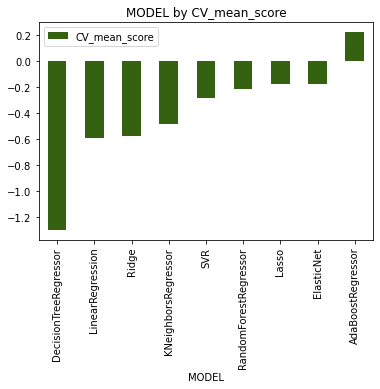

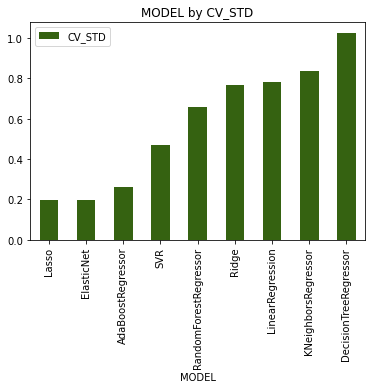

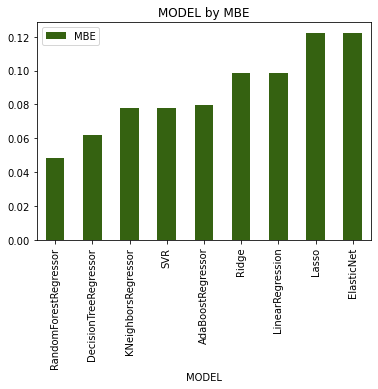

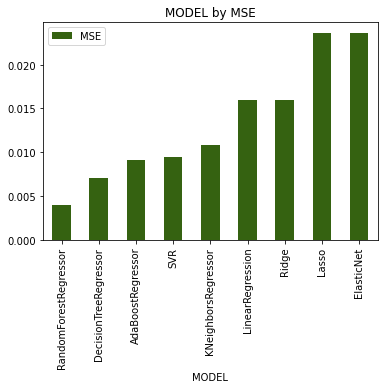

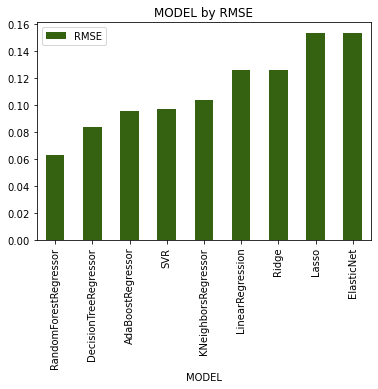

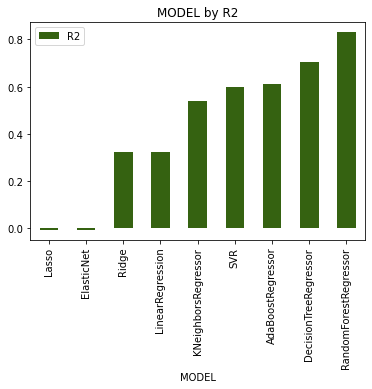

In [40]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = Avacado_color_4)
    plt.title(f"MODEL by {metric}")
    plt.show()

### From Above observation its is evident that Randomforest is the best model with Score of 0.97 lets try in Hyper tuning the same

In [41]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train_1, y_train_1, cv=5, n_jobs=-1).mean()

1.080514929328622

In [42]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# HYPER TUNING.......

In [43]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

In [44]:
reg_grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [45]:
reg_grid.fit(x_train_1, y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [46]:
reg_grid.best_score_

0.8128205044603447

In [47]:
reg_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', random_state=42)

In [48]:
reg_final_model = reg_grid.best_estimator_
preds = cross_val_predict(reg_final_model, x_train_1, y_train_1, cv=5, n_jobs=-1)
preds.mean()

1.079175

In [49]:
reg_final_model.fit(x_train_1,y_train_1)

RandomForestRegressor(bootstrap=False, max_features='sqrt', random_state=42)

In [50]:
reg_final_model.score(x_train_1,y_train_1)

1.0

### Post the hyper tuning we can see that the performance of the RandomForest Regressor has increased from 97% - 99%. 